### Sesonal 시계열 분석으로 주식 데이터 분석하기

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from fbprophet import Prophet
from datetime import datetime
import pandas_datareader as pdr

In [4]:
# Datareader = pandas에서 주가 정보를 받아오는 기능
start = datetime(2013, 1, 1)
end = datetime(2020, 12, 4)

KIA = pdr.DataReader('000270.KS', data_source='yahoo', start=start, end=end)
KIA.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-01-02,57400.0,56000.0,57000.0,56300.0,2145047.0,56300.0
2013-01-03,56700.0,54100.0,56300.0,54600.0,4392999.0,54600.0
2013-01-04,54600.0,52700.0,54300.0,53600.0,3916692.0,53600.0
2013-01-07,54500.0,53600.0,53800.0,54000.0,2061988.0,54000.0
2013-01-08,54800.0,53700.0,53700.0,54500.0,1899832.0,54500.0


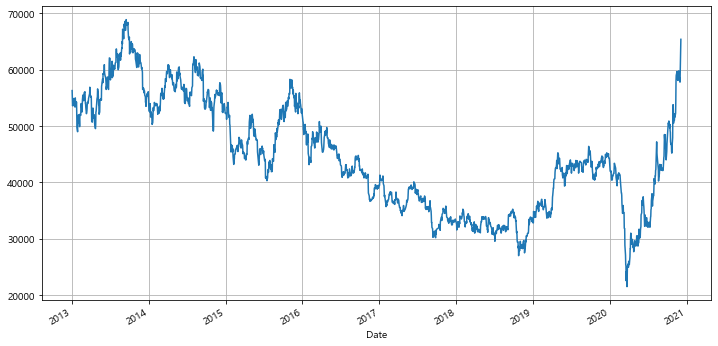

In [5]:
KIA['Close'].plot(figsize=(12,6), grid=True)
plt.show()

In [6]:
KIA_trunc = KIA[:'2020-06-30']
KIA_trunc.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-24,34450.0,32550.0,32700.0,33750.0,2345625.0,33750.0
2020-06-25,33200.0,32500.0,33050.0,32550.0,1495320.0,32550.0
2020-06-26,33500.0,32850.0,33100.0,33050.0,1329381.0,33050.0
2020-06-29,32500.0,31900.0,32300.0,32100.0,1259626.0,32100.0
2020-06-30,32650.0,32050.0,32600.0,32050.0,1193847.0,32050.0


#### 별도의 데이터프레임 만들기

In [7]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2013-01-02,56300.0
1,2013-01-03,54600.0
2,2013-01-04,53600.0
3,2013-01-07,54000.0
4,2013-01-08,54500.0


In [8]:
model = Prophet(daily_seasonality=True)
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


In [9]:
# periods = 예측을 원하는 날짜 넣기(1년:365)
future = model.make_future_dataframe(periods=157)
future.tail()

,ds
1988,2020-11-30
1989,2020-12-01
1990,2020-12-02
1991,2020-12-03
1992,2020-12-04


In [10]:
forecast = model.predict(future)

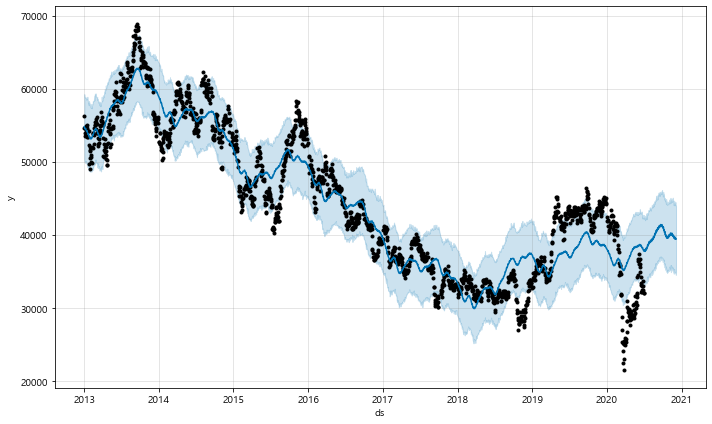

In [11]:
# 뒤에 ;을 넣으면 그래프가 하나만 보인다.
model.plot(forecast);

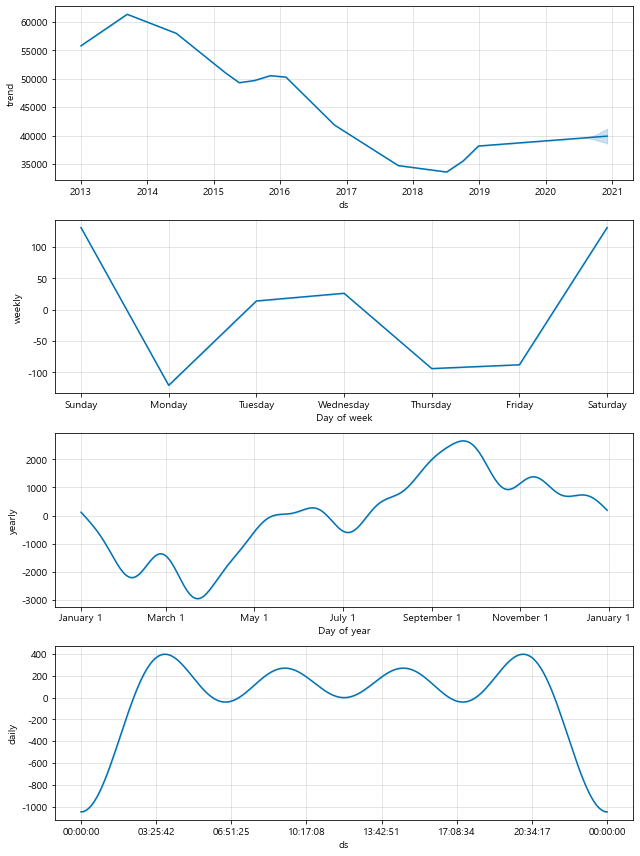

In [12]:
model.plot_components(forecast);

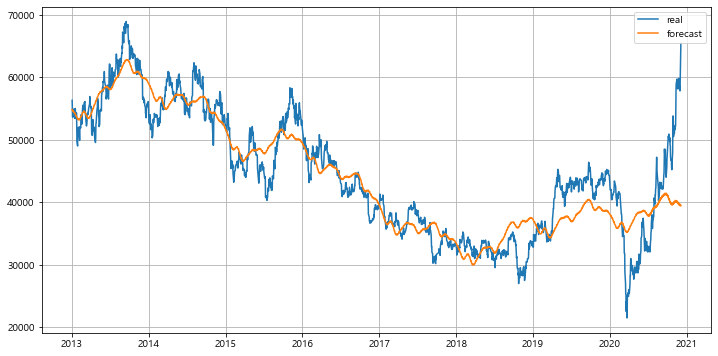

In [13]:
# 참값과 예측값을 같이 두고 그래프 그리기

plt.figure(figsize=(12,6))
plt.plot(KIA.index, KIA.Close, label='real')
plt.plot(forecast.ds, forecast.yhat, label='forecast')
plt.grid()
plt.legend()
plt.show()

### Growth Model과 holiday Forecast

In [14]:
df = pd.read_csv('./data/08. example_wp_R.csv')
df['y'] = np.log(df['y'])
df

,ds,y
0,2008-01-30,5.976351
1,2008-01-16,6.049733
2,2008-01-17,6.011267
3,2008-01-14,5.953243
4,2008-01-15,5.910797
...,...,...
2858,2015-12-11,7.834788
2859,2015-12-12,7.360104
2860,2015-12-13,7.479864
2861,2015-12-18,7.765145


In [15]:
df['cap'] = 8.5

In [16]:
m = Prophet(growth='logistic')
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


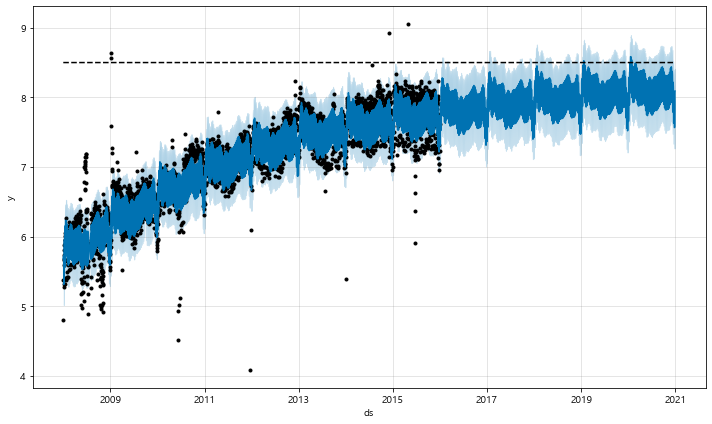

In [17]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
m.plot(fcst);

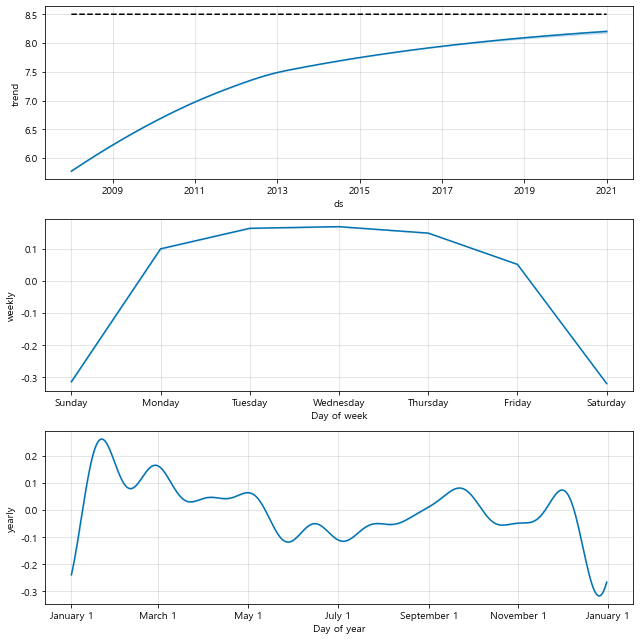

In [18]:
forecast = m.predict(future)
m.plot_components(forecast);